
# Mode finding for concentric glass tubes in air

N3 configuration in paper by Bird.

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


importing NGSolve-6.2.2203-56-g47f483033


# Initialize Parameters

In [19]:
n_air = 1.00027717
n_glass = 1.4388164768221814

ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 10*2.7183333333333333e-6, 15*3/3*1e-6, 15*2.7183333333333333e-6]
mats = ['air', 'glass', 'air', 'glass', 'air']
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x:n_glass, lambda x:n_air]
maxhs = [.2, .02, .1, .01, .1]

n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)

# Mode Finding and Viewing

In [20]:
i = 200
A = BraggExact(ts=ts, ns=ns, mats=mats, maxhs=maxhs)


In [21]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [22]:
k_low = A.k0 * A.ns[0] * A.scale
k_low

52.37439014709314

In [23]:
outer = 'h2'
nu = 1

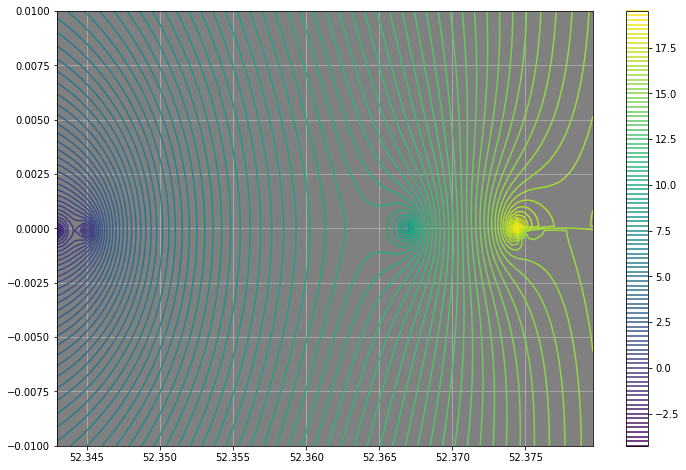

In [24]:
k_low = A.k0 * A.ns[0] * A.scale

plotlogf(A.determinant, .9994*k_low, 1.0001*k_low, -.01,.01, nu, outer,
         iref=100, rref=100, levels=100)

In [25]:
guess = np.array(.9999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (52.366914602389784-8.707287093305495e-09j) . Residual of determinant:  1.0289757937229989e-10


# Bragg Exact Fields

In [26]:
Fs = A.all_fields(beta1, nu, outer)

## Z-Components

In [27]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs['Ephi'].imag, A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Hphi'].imag, A.mesh)

## Hybrid Transverse fields

In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})

# TE/TM fields

In [ ]:
outer = 'h2'
nu = 0

In [ ]:
plotlogf(A.determinant, .995*k_low, 1.0001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

## What appears to be one root is actually two.

In [ ]:
plotlogf(A.determinant, .997*k_low, .998*k_low, -.01,.01, nu, outer,
         iref=100, rref=100, levels=100)

In [ ]:
guess = np.array(52.23)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


In [ ]:
guess = np.array(52.24)

beta2 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta2, ". Residual of determinant: ", abs(A.determinant(beta2, nu, outer)))


# Fields for lower beta: It's TE

In [ ]:
Fs = A.all_fields(beta1, nu, outer)

## Z-Components

In [ ]:
Draw(1e1*Fs['Ez'], A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

## Transverse fields

### Etv imaginary, then Etv real

In [ ]:
Draw(Fs['Etv'].imag, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


### Htv imaginary, then Htv real

In [ ]:
Draw(Fs['Htv'].imag, A.mesh, vectors={'grid_size':100})

In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})

# Fields for higher beta: TM

In [ ]:
Fs = A.all_fields(beta2, nu, outer)

## Z-Components

In [ ]:
Draw(1e1*Fs['Ez'], A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

## Transverse fields

### Etv imaginary and then real

In [ ]:
Draw(Fs['Etv'].imag, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})

### Htv imaginary and the real

In [ ]:
Draw(Fs['Htv'].imag, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})

# Lower pair of TE/TM fields

It appears they come in pairs as we descend the real part of beta, with TM higher in real part, then TE

In [ ]:
outer = 'h2'
nu = 0

In [ ]:
plotlogf(A.determinant, .993*k_low, 1.0001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

In [ ]:
plotlogf(A.determinant, .993*k_low, .995*k_low, -.02,.01, nu, outer,
         iref=100, rref=100, levels=100)

In [ ]:
guess = np.array(52.02)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


In [ ]:
guess = np.array(52.06)

beta2 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta2, ". Residual of determinant: ", abs(A.determinant(beta2, nu, outer)))


# Fields for lower beta: It's TE

In [ ]:
Fs = A.all_fields(beta1, nu, outer)

## Z-Components

In [ ]:
Draw(1e1*Fs['Ez'], A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

## Transverse fields

### Etv imaginary, then Etv real

In [ ]:
Draw(Fs['Etv'].imag, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


### Htv imaginary, then Htv real

In [ ]:
Draw(Fs['Htv'].imag, A.mesh, vectors={'grid_size':100})

In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})

# Fields for higher beta: TM

In [ ]:
Fs = A.all_fields(beta2, nu, outer)

## Z-Components

In [ ]:
Draw(1e1*Fs['Ez'], A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

## Transverse fields

### Etv imaginary and then real

In [ ]:
Draw(Fs['Etv'].imag, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})

### Htv imaginary and the real

In [ ]:
Draw(Fs['Htv'].imag, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})